In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
credit_card_data = pd.read_csv('creditcard.csv')

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
legit = credit_card_data[credit_card_data['Class'] == 0]

In [10]:
fraud = credit_card_data[credit_card_data['Class'] == 1]

In [11]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [12]:
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [16]:
legit_sample = legit.sample(n=492)

In [17]:
new_dataset = pd.concat((legit_sample, fraud),axis=0)

In [18]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
129305,79038.0,-0.302202,0.827571,1.622121,-0.571578,-0.280031,-1.339959,0.779281,-0.283954,-0.555160,...,0.070185,0.242103,0.018965,1.009777,-0.647777,0.815764,0.064449,0.150034,10.00,0
145546,87038.0,-0.475220,0.641170,0.682253,-0.500468,-0.405646,0.199609,-0.706348,0.838064,0.423906,...,0.325085,0.974976,0.149508,0.717569,-1.016550,0.341950,0.272246,0.129741,22.10,0
202663,134435.0,-0.426116,0.391218,-2.001749,-0.072814,0.003499,-1.229515,2.511679,-0.256807,-0.713133,...,0.640604,1.360228,0.391690,0.004383,0.409587,-0.252893,-0.159847,0.009851,319.59,0
12690,22244.0,-0.598398,-3.164154,0.293793,1.110677,-1.578065,1.258206,0.117709,0.210840,2.132429,...,0.243857,-0.758140,-0.617877,-0.248228,-0.398075,0.823318,-0.196272,0.141653,875.92,0
118808,75221.0,-2.060665,2.177958,0.657502,-0.607044,0.150209,-0.525362,0.959638,-0.305789,1.242167,...,-0.604988,-0.723634,-0.081474,-0.083351,0.114021,-0.016228,0.051192,-0.403254,8.98,0


In [19]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [20]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 129305 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64
 22 

In [21]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [22]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93667.684959,-0.098561,-0.020889,0.007417,-0.057127,0.001909,0.047730,0.061488,0.048256,-0.076154,...,-0.023871,0.018525,-0.042359,0.057488,-0.010418,-0.034602,-0.020023,0.000945,0.012115,98.649248
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# training and splitting data

In [23]:
X = new_dataset.drop(columns='Class', axis = 1)
y = new_dataset['Class']

In [24]:
print(X)

            Time        V1        V2        V3        V4        V5        V6   
129305   79038.0 -0.302202  0.827571  1.622121 -0.571578 -0.280031 -1.339959  \
145546   87038.0 -0.475220  0.641170  0.682253 -0.500468 -0.405646  0.199609   
202663  134435.0 -0.426116  0.391218 -2.001749 -0.072814  0.003499 -1.229515   
12690    22244.0 -0.598398 -3.164154  0.293793  1.110677 -1.578065  1.258206   
118808   75221.0 -2.060665  2.177958  0.657502 -0.607044  0.150209 -0.525362   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [25]:
print(y)

129305    0
145546    0
202663    0
12690     0
118808    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [27]:
print(X_test.shape,X_train.shape,X.shape)

(197, 30) (787, 30) (984, 30)


In [28]:
model = LogisticRegression()

In [29]:
model.fit(X_train,y_train)

LogisticRegression()

In [30]:
#accuracy on training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('training accuracy', training_data_accuracy)                               

training accuracy 0.9326556543837357


In [31]:
#accuracy on test data

X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('testing accuracy', testing_data_accuracy)    

testing accuracy 0.9593908629441624


In [32]:
from sklearn.svm import SVC

In [33]:
svc_model = SVC()

In [34]:
svc_model.fit(X_train,y_train)

SVC()

In [35]:
predictions = svc_model.predict(X_test)

In [36]:
print(predictions)

[0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 1 1]


In [37]:
print(y_test)

230076    1
262826    1
51773     0
30314     1
36455     0
         ..
88127     0
6472      1
112726    0
52466     1
12237     0
Name: Class, Length: 197, dtype: int64


In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(confusion_matrix(y_test,predictions))

[[71 28]
 [59 39]]


In [59]:
log_accuracy = accuracy_score(y_test,predictions)
print(log_accuracy)

0.5583756345177665


In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.55      0.72      0.62        99
           1       0.58      0.40      0.47        98

    accuracy                           0.56       197
   macro avg       0.56      0.56      0.55       197
weighted avg       0.56      0.56      0.55       197



In [42]:
from sklearn.ensemble import AdaBoostClassifier  # for classification tasks
from sklearn.ensemble import AdaBoostRegressor   # for regression tasks
from sklearn.tree import DecisionTreeClassifier  # base classifier for classification
from sklearn.tree import DecisionTreeRegressor   # base regressor for regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # for classification tasks
from sklearn.metrics import mean_squared_error 

In [43]:
base_classifier = DecisionTreeClassifier(max_depth=1)  
modelAda = AdaBoostClassifier(base_classifier, n_estimators=50, learning_rate=1.0)  

base_regressor = DecisionTreeRegressor(max_depth=3) 
modelAda = AdaBoostRegressor(base_regressor, n_estimators=50, learning_rate=1.0)  

In [44]:
 model.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred = model.predict(X_test)
print(y_pred)

[1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1
 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1
 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0
 1 1 1 1 0 0 0 0 1 0 1 0]


In [46]:
len(y_pred)

197

In [47]:
print(y_test)

230076    1
262826    1
51773     0
30314     1
36455     0
         ..
88127     0
6472      1
112726    0
52466     1
12237     0
Name: Class, Length: 197, dtype: int64


In [48]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.04060913705583756


In [49]:
rmse = np.sqrt(np.mean(mse))
print(rmse)

0.20151708874395133


In [50]:
threshold = 0.5
binary_predictions = [1 if pred >= threshold else 0 for pred in y_pred]

In [51]:
accuracy = accuracy_score(y_test, binary_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9593908629441624


In [52]:
print(confusion_matrix(y_test, binary_predictions))

[[95  4]
 [ 4 94]]


In [53]:
print(classification_report(y_test, binary_predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        99
           1       0.96      0.96      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



In [54]:
nd = new_dataset.corr()

In [55]:
print(nd)

            Time        V1        V2        V3        V4        V5        V6   
Time    1.000000  0.235242 -0.219158  0.148714 -0.209938  0.288118  0.096089  \
V1      0.235242  1.000000 -0.788048  0.877712 -0.605224  0.852217  0.316442   
V2     -0.219158 -0.788048  1.000000 -0.858123  0.676556 -0.787899 -0.272921   
V3      0.148714  0.877712 -0.858123  1.000000 -0.768442  0.846320  0.455690   
V4     -0.209938 -0.605224  0.676556 -0.768442  1.000000 -0.573567 -0.442551   
V5      0.288118  0.852217 -0.787899  0.846320 -0.573567  1.000000  0.270071   
V6      0.096089  0.316442 -0.272921  0.455690 -0.442551  0.270071  1.000000   
V7      0.221753  0.879760 -0.839891  0.886409 -0.708460  0.819718  0.292031   
V8     -0.148332 -0.083911 -0.019984 -0.168152  0.102730 -0.206384 -0.558307   
V9      0.151445  0.650280 -0.689824  0.764394 -0.775454  0.660643  0.356459   
V10     0.209480  0.739352 -0.765663  0.858549 -0.796557  0.750271  0.418305   
V11    -0.299053 -0.523773  0.617540 -0.

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'heatmap')

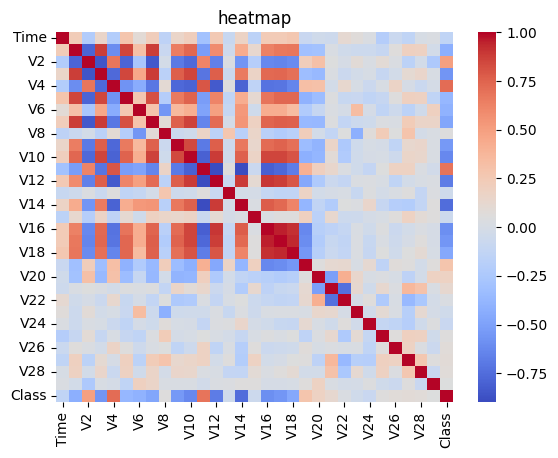

In [58]:
sns.heatmap(nd,cmap='coolwarm')
plt.title('heatmap')

In [60]:
models = ["Logistic Regression", "AdaBoost"]
accuracy_scores = [log_accuracy, accuracy]

(0.0, 1.0)

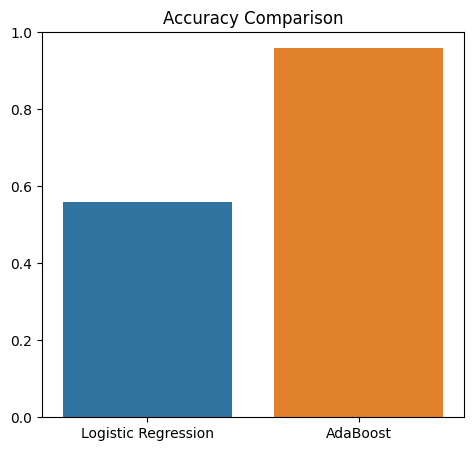

In [61]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=accuracy_scores)
plt.title("Accuracy Comparison")
plt.ylim([0, 1])